In [1]:
import pandas as pd

In [5]:
tsla_close=pd.read_csv('tsla_close_last_3_years.csv')
tsla_close

,Date,TSLA_Close
0,2022-02-22,273.843323
1,2022-02-23,254.679993
2,2022-02-24,266.923340
3,2022-02-25,269.956665
4,2022-02-28,290.143341
...,...,...
744,2025-02-10,350.730011
745,2025-02-11,328.500000
746,2025-02-12,336.510010
747,2025-02-13,355.940002


In [7]:
tsla_close['Date'] = pd.to_datetime(tsla_close['Date'])  # Convert to datetime format
tsla_close.set_index('Date', inplace=True)  # Set 'Date' as index


In [11]:
tsla_close

,TSLA_Close
Date,
2022-02-22,273.843323
2022-02-23,254.679993
2022-02-24,266.923340
2022-02-25,269.956665
2022-02-28,290.143341
...,...
2025-02-10,350.730011
2025-02-11,328.500000
2025-02-12,336.510010


In [13]:
tsla_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2022-02-22 to 2025-02-14
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TSLA_Close  749 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [15]:
tsla_close.describe()

,TSLA_Close
count,749.000000
mean,239.376320
std,66.033085
min,108.099998
25%,189.559998
50%,233.066666
75%,266.923340
max,479.859985


# Time series analysis of TSLA

In [21]:
## Computing Daily Returns

tsla_close["Daily Return"] = tsla_close["TSLA_Close"].pct_change()

#Display the first few rows
tsla_close[['TSLA_Close', 'Daily Return']].head()

,TSLA_Close,Daily Return
Date,,
2022-02-22,273.843323,NaN
2022-02-23,254.679993,-0.069979
2022-02-24,266.923340,0.048073
2022-02-25,269.956665,0.011364
2022-02-28,290.143341,0.074777


In [23]:
# Fill missing values using backward fill
tsla_close = tsla_close.fillna(method='bfill')

# Check if missing values still exist
tsla_close.isnull().sum()

C:\Users\Amanp\AppData\Local\Temp\ipykernel_13672\2547558280.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_close = tsla_close.fillna(method='bfill')


TSLA_Close      0
Daily Return    0
dtype: int64

In [25]:
tsla_close

,TSLA_Close,Daily Return
Date,,
2022-02-22,273.843323,-0.069979
2022-02-23,254.679993,-0.069979
2022-02-24,266.923340,0.048073
2022-02-25,269.956665,0.011364
2022-02-28,290.143341,0.074777
...,...,...
2025-02-10,350.730011,-0.030114
2025-02-11,328.500000,-0.063382
2025-02-12,336.510010,0.024384


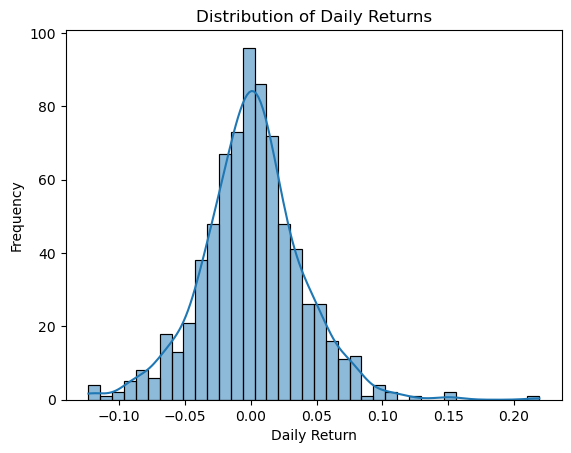

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for kde plot

sns.histplot(tsla_close['Daily Return'], kde=True )

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

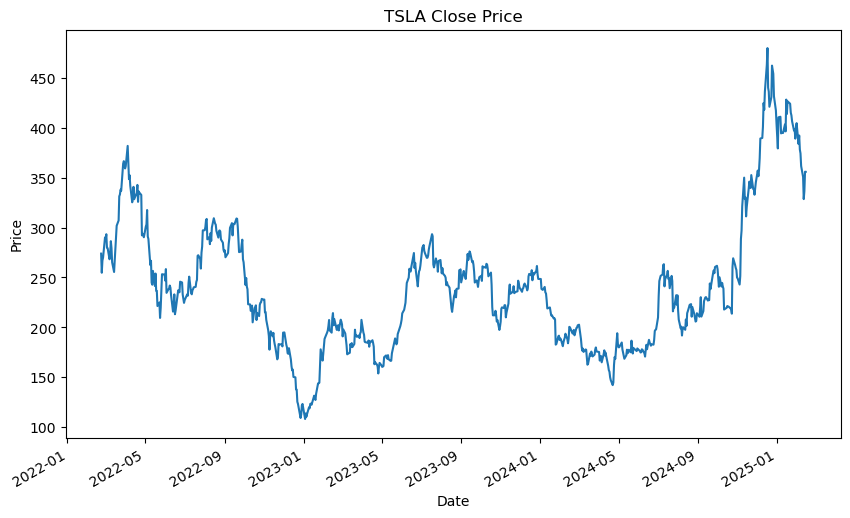

In [29]:
# Plotting the close price of tsla
plt.figure(figsize=(10,6))
tsla_close['TSLA_Close'].plot()

#plt.plot(x,y)
plt.title('TSLA Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

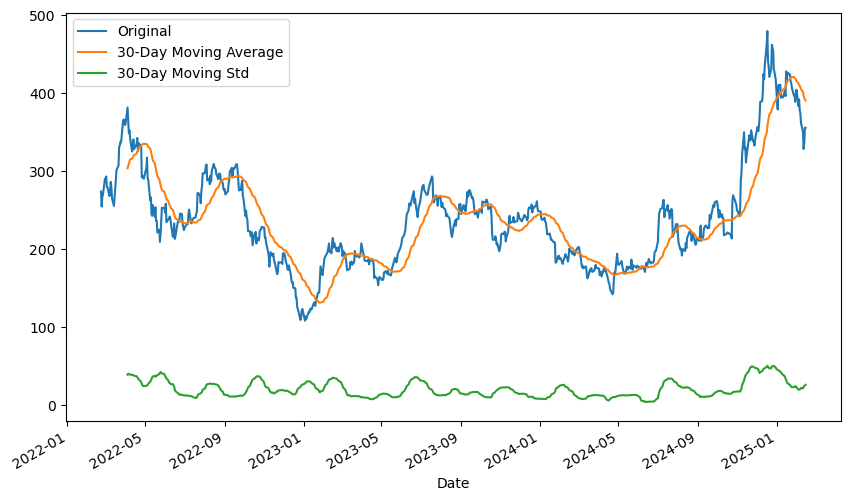

In [33]:
# Plot rolling mean(moving average) and standard deviation
tsla_close['TSLA_Close'].plot(label='Original', figsize=(10,6))
#line plot of original stock prices

tsla_close['TSLA_Close'].rolling(window=30).mean().plot(label='30-Day Moving Average')
#line plot rolling mean values

tsla_close['TSLA_Close'].rolling(window=30).std().plot(label='30-Day Moving Std')
plt.legend()
plt.show()

In [35]:
#Handling OUTLIERS
from scipy import stats

#calculate z-scores
z_scores = stats.zscore(tsla_close)

# Define a threshold for outliers (absolute Z-score > 3)
outliers = tsla_close[abs(z_scores) > 3]

# Display the outliers
outliers

,TSLA_Close,Daily Return
Date,,
2022-02-22,NaN,NaN
2022-02-23,NaN,NaN
2022-02-24,NaN,NaN
2022-02-25,NaN,NaN
2022-02-28,NaN,NaN
...,...,...
2025-02-10,NaN,NaN
2025-02-11,NaN,NaN
2025-02-12,NaN,NaN


In [37]:
outliers.dropna()

,TSLA_Close,Daily Return
Date,,


## Decomposition of time series

In [40]:
# Perform seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x800 with 0 Axes>

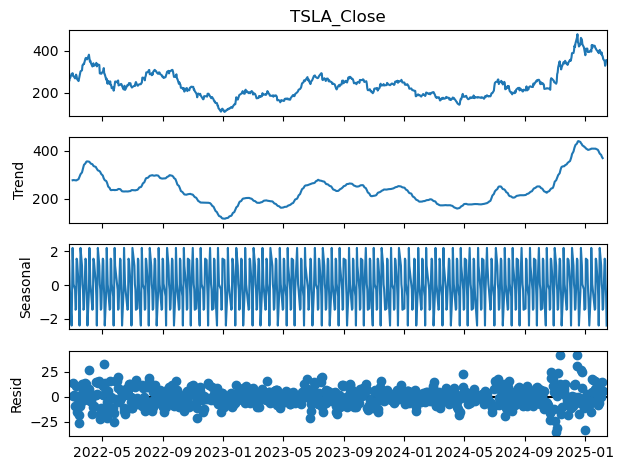

In [42]:
# Decompose the series
decomposition = seasonal_decompose(tsla_close['TSLA_Close'], model="additive", period=12)

# Plot the decomposition results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
decomposition.plot() #line plots
plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'GM_Close' series
adf_result = adfuller(tsla_close['TSLA_Close'])

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values

(-1.999122935366135,
 0.28695779381268705,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903})

In [46]:
tsla_close.index[-100:]

DatetimeIndex(['2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-30', '2024-10-01', '2024-10-02',
               '2024-10-03', '2024-10-04', '2024-10-07', '2024-10-08',
               '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-14',
               '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18',
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01', '2024-11-04', '2024-11-05',
               '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11',
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
               '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21',
               '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10',
      

In [48]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
tsla_close.drop(columns=["Daily Return"], inplace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5481.720, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5483.527, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5483.541, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5479.822, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5483.759, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.933 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  749
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2738.911
Date:                Tue, 18 Feb 2025   AIC                           5479.822
Time:                        17:43:19   BIC                           5484.439
Sample:                             0   HQIC                          5481.601
                                - 749                                       

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


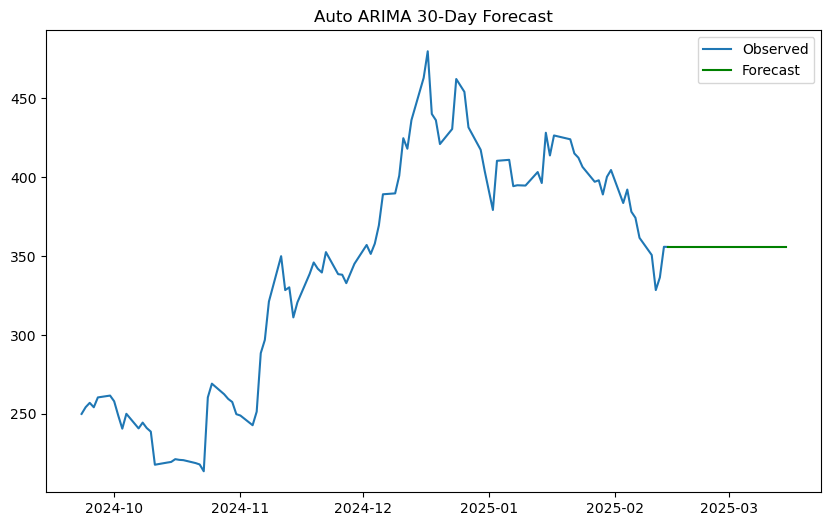

In [56]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA model
auto_model = pm.auto_arima(tsla_close,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=5, max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast the next 30 days using the best ARIMA model
forecast = auto_model.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))

#line plot of original data or stock prices
plt.plot(tsla_close.index[-100:], tsla_close[-100:], label='Observed')

plt.plot(pd.date_range(tsla_close.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5896.201, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5662.196, Time=0.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5897.190, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5606.820, Time=0.96 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5552.108, Time=1.79 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=7.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=5550.339, Time=1.01 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5605.256, Time=0.47 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=4.62 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.65 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5552.135, Time=1.18 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=5551.928, Time=2.22 sec
 ARIMA(0,1,0)(3,1,0)[12] intercept   : AIC=5

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


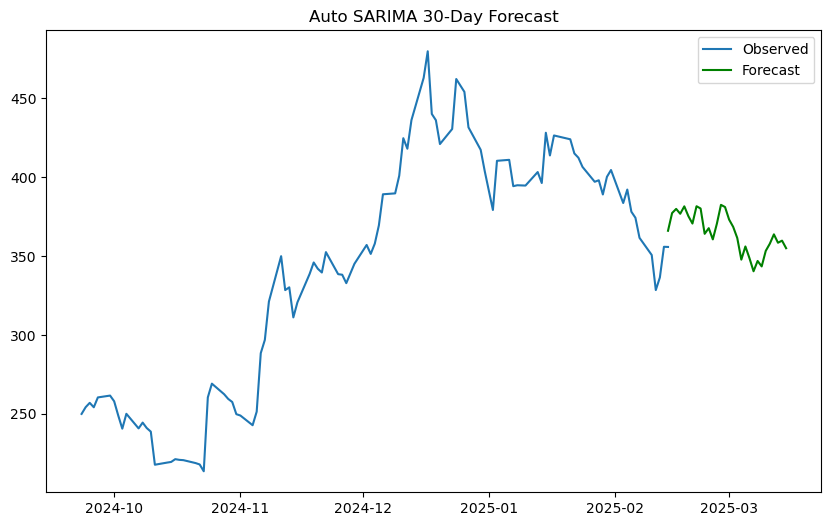

In [59]:
# Fit auto_arima model (with seasonal component)
auto_sarima = pm.auto_arima(tsla_close,
                            seasonal=True,
                            m=12,  # Assuming monthly seasonality
                            start_p=0, start_q=0,
                            test='adf',
                            max_p=3, max_q=3,
                            start_P=0, start_Q=0,
                            max_P=3, max_Q=3,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 periods
forecast_sarima = auto_sarima.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(tsla_close.index[-100:], tsla_close[-100:], label='Observed')
plt.plot(pd.date_range(tsla_close.index[-1], periods=30, freq='D'), forecast_sarima, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()


In [61]:
forecast

749    355.839996
750    355.839996
751    355.839996
752    355.839996
753    355.839996
754    355.839996
755    355.839996
756    355.839996
757    355.839996
758    355.839996
759    355.839996
760    355.839996
761    355.839996
762    355.839996
763    355.839996
764    355.839996
765    355.839996
766    355.839996
767    355.839996
768    355.839996
769    355.839996
770    355.839996
771    355.839996
772    355.839996
773    355.839996
774    355.839996
775    355.839996
776    355.839996
777    355.839996
778    355.839996
dtype: float64

In [63]:
forecast_sarima

749    366.092521
750    377.315313
751    379.950637
752    376.876726
753    381.578282
754    375.363420
755    370.668580
756    381.642706
757    380.211418
758    364.164128
759    367.738609
760    360.637799
761    370.601458
762    382.524974
763    381.136712
764    373.194486
765    368.571372
766    361.533165
767    347.800505
768    356.140057
769    348.726457
770    340.423778
771    346.955102
772    343.497640
773    353.359238
774    357.905602
775    363.825592
776    358.509969
777    359.832833
778    355.037072
dtype: float64

In [ ]:
forcast=